In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import math

In [2]:
df = pd.read_csv('housing_data.txt', header = None, delim_whitespace=True)
print(df)

data = df.iloc[:,:].values
features = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
            'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
            'LSTAT', 'MEDV');

           0     1      2   3      4      5      6       7   8      9     10  \
0     0.00632  18.0   2.31   0  0.538  6.575   65.2  4.0900   1  296.0  15.3   
1     0.02731   0.0   7.07   0  0.469  6.421   78.9  4.9671   2  242.0  17.8   
2     0.02729   0.0   7.07   0  0.469  7.185   61.1  4.9671   2  242.0  17.8   
3     0.03237   0.0   2.18   0  0.458  6.998   45.8  6.0622   3  222.0  18.7   
4     0.06905   0.0   2.18   0  0.458  7.147   54.2  6.0622   3  222.0  18.7   
5     0.02985   0.0   2.18   0  0.458  6.430   58.7  6.0622   3  222.0  18.7   
6     0.08829  12.5   7.87   0  0.524  6.012   66.6  5.5605   5  311.0  15.2   
7     0.14455  12.5   7.87   0  0.524  6.172   96.1  5.9505   5  311.0  15.2   
8     0.21124  12.5   7.87   0  0.524  5.631  100.0  6.0821   5  311.0  15.2   
9     0.17004  12.5   7.87   0  0.524  6.004   85.9  6.5921   5  311.0  15.2   
10    0.22489  12.5   7.87   0  0.524  6.377   94.3  6.3467   5  311.0  15.2   
11    0.11747  12.5   7.87   0  0.524  6

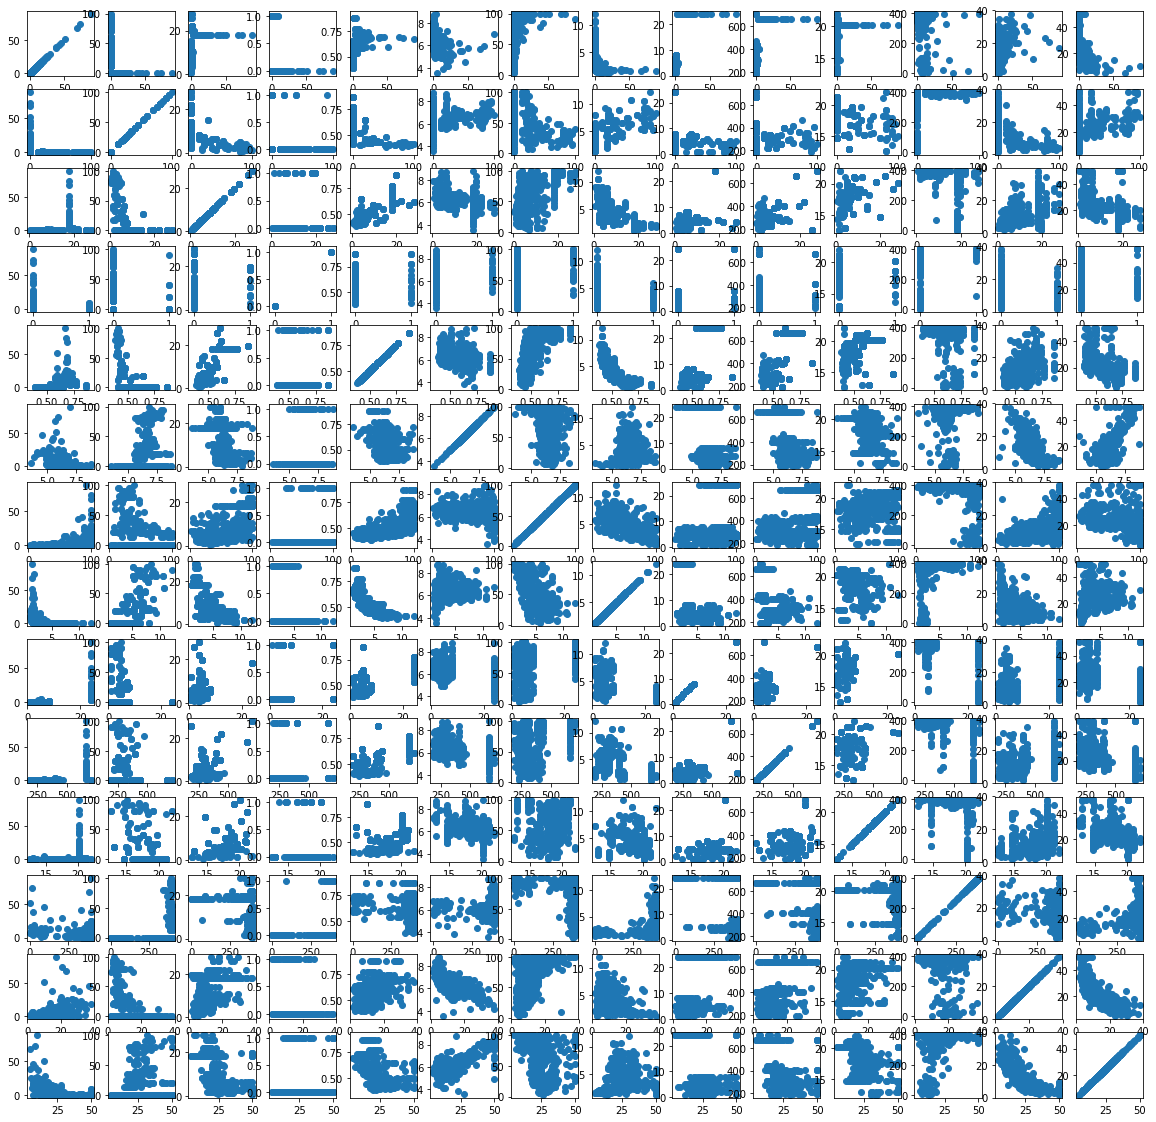

In [3]:
fig, ax = plt.subplots(nrows=len(data[0]), ncols=len(data[0]), figsize= (20,20))

for i in range(len(data[0])):
    for j in range(len(data[0])):
        ax[i][j].scatter(data[:,i], data[:,j])

plt.show()

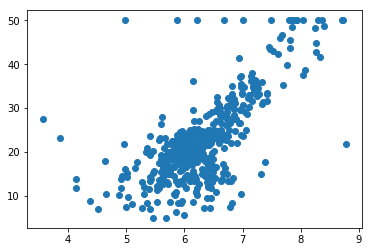

In [4]:
# Chosen features: features 5 and 13
chosen_features=(5,13)

plt.close()
plt.scatter(data[:,chosen_features[0]], data[:,chosen_features[1]])
plt.show()

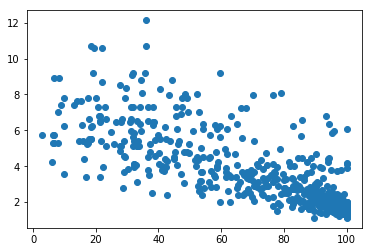

In [5]:
# Chosen features: features 6 and 7
chosen_features=(6,7)

plt.close()
plt.scatter(data[:,chosen_features[0]], data[:,chosen_features[1]])
plt.show()

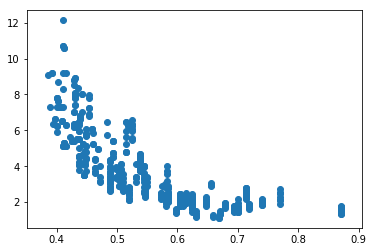

In [6]:
# Chosen features: features 4 and 7
chosen_features=(4,7)

plt.close()
plt.scatter(data[:,chosen_features[0]], data[:,chosen_features[1]])
plt.show()

In [7]:
# Predicting a feature using various regression techniques

regressor_names = ("Linear Regression", "Ridge Regression", 
                   "Kernel Ridge Regression", "Support Vector Regression",
                   "Lassor Regression", "Elastic Net Regression")

def features_target_split(target_feature_num):
    selector = [x for x in range(data.shape[1]) if x != target_feature_num]
    return data[:,selector], data[:,target_feature_num].reshape(-1,1)

def train_test_validation_split(val_frac, test_frac):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_frac, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_frac/(1-test_frac), random_state=1)
    return X_train, X_val, X_test, y_train, y_val, y_test

def multi_regression(X_train, y_train):
    regressors = []
    regressors.append(LinearRegression().fit(X_train, y_train))
    regressors.append(Ridge().fit(X_train, y_train))
    regressors.append(KernelRidge().fit(X_train, y_train))
    regressors.append(SVR().fit(X_train, y_train))
    regressors.append(Lasso().fit(X_train, y_train))
    regressors.append(ElasticNet().fit(X_train, y_train))
    return regressors

In [8]:
# Predicting feature 7

# Get features and target
features, target = features_target_split(7)

# Train: 60%, Validation: 20%, Test: 20%
X_train, X_val, X_test, y_train, y_val, y_test = train_test_validation_split(0.2, 0.2)

# Train multiple regressors
regressors = multi_regression(X_train, y_train)

for idx, r in enumerate(regressors):
    print(regressor_names[idx])
    print("Validation score: ", r.score(X_val, y_val))
    print("Test score: ", r.score(X_test, y_test))
    print()

Linear Regression
Validation score:  0.771316853527
Test score:  0.699793583565

Ridge Regression
Validation score:  0.763346627256
Test score:  0.689401017358

Kernel Ridge Regression
Validation score:  0.727232792042
Test score:  0.624345520043

Support Vector Regression
Validation score:  -0.00867326941501
Test score:  0.00609769734681

Lassor Regression
Validation score:  0.720008098067
Test score:  0.635436771412

Elastic Net Regression
Validation score:  0.730778606016
Test score:  0.658073460806



/Users/Pthaper/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Predicting feature 13

# Get features and target
features, target = features_target_split(13)

# Train: 60%, Validation: 20%, Test: 20%
X_train, X_val, X_test, y_train, y_val, y_test = train_test_validation_split(0.2, 0.2)

# Train multiple regressors
regressors = multi_regression(X_train, y_train)

for idx, r in enumerate(regressors):
    print(regressor_names[idx])
    print("Validation score: ", r.score(X_val, y_val))
    print("Test score: ", r.score(X_test, y_test))
    print()

Linear Regression
Validation score:  0.719219008101
Test score:  0.737973081169

Ridge Regression
Validation score:  0.719686598217
Test score:  0.741655971406

Kernel Ridge Regression
Validation score:  0.741011807442
Test score:  0.767092519761

Support Vector Regression
Validation score:  0.00723065137404
Test score:  0.00731134834876

Lassor Regression
Validation score:  0.616569564522
Test score:  0.63888056336

Elastic Net Regression
Validation score:  0.633432510862
Test score:  0.65748882831



/Users/Pthaper/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Discussion:
#     In this assignment, various correlating pairs were chosen and plotted to confirm their correlation. The pairs 
# chosen were (5, 13), (6, 7), and (4, 7). They all seem to be well correlated though the last may not have a linear
# correlation.
#     Afterwards, two features were chosen to be predicted using various sklearn regression modules. The features 
# chosen were features 7 and 13 since they were numerical features that were well correlated with many of the other
# twelve features, making them good candidates for prediction. Predictions were done with the Linear Regression, Ridge
# Regression, Kernel Ridge Regression, Support Vector Regression, Lassor Regression, and Elastic Net Regression modules
# from sklearn. Ther results show the strongest performance by the Kernel Ridge Regressor which likely stems from the
# multicollinearity of each of these chosen features with the other features. The Support Vector Regressor seems to 
# perform the worst for both of these predicted features. 